In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False
import warnings
warnings.filterwarnings('ignore')

### 군집 알고리즘 비교와 평가

#### 타겟 값으로 군집 평가

ARI/ NMI: 최적의 값을 가질 때 1이라는 값을 가지고, 군집이 잘 분류 되지 않고 무작위로 생성 되었을 때 0이라는 값을 가짐 = 0~1 사이의 값을 가짐.

** ARI는 음수가 될 수도 있음.

In [2]:
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
x, y= make_moons(n_samples= 200, noise= 0.05, random_state= 0)

In [4]:
# Standard Scaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [5]:
# 사용할 알고리즘 모델을 리스트로 변환
al= [KMeans(n_clusters= 2), AgglomerativeClustering(n_clusters= 2), DBSCAN()]

In [6]:
# 비교를 위해 무작이로 클러스터 할당
random_state= np.random.RandomState(seed= 0)
random_clusters= random_state.randint(low= 0, high= 2, size= len(x))

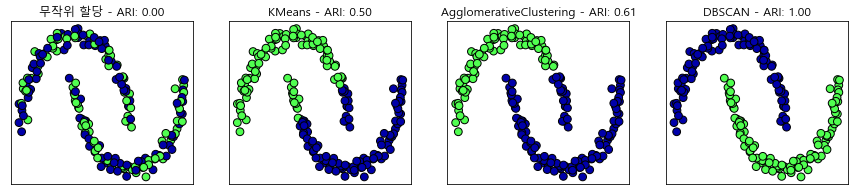

In [7]:
fig, axes= plt.subplots(1, 4, figsize= (15, 3),
                        subplot_kw= {'xticks': (), 'yticks': ()})

# 무작위로 할당한 클러스터 그리기
axes[0].scatter(x_scaled[:, 0], x_scaled[:, 1], c= random_clusters,
                cmap= mglearn.cm3, s= 60, edgecolors= 'black')
axes[0].set_title('무작위 할당 - ARI: {:.2f}'.format(adjusted_rand_score(y,
                                                     random_clusters)))
for ax, algorithm in zip (axes[1:], al):
    
    clusters= algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c= clusters,
               cmap= mglearn.cm3, s= 60, edgecolors= 'black')
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
cluster1= [0, 0, 1, 1, 0]
cluster2= [1, 1, 0, 0, 1]

print('정확도: {:.2f}'.format(accuracy_score(cluster1, cluster2)))
print('ARI: {:.2f}'.format(adjusted_rand_score(cluster1, cluster2)))

정확도: 0.00
ARI: 1.00


군집에서는 accuracy를 사용하면 안됨

### 실루엣 지수
- 잘 작동이 되지 않는 지표
- 클러스터의 밀집도를 계산해줘서 값이 높을수록 좋고 최대 점수 1을 가짐
- 복잡할 때 밀집도를 활용한 평가는 잘 맞지 않음
- 1과 -1 사이의 값을 가짐
- 이때 값이 -1일이면 군집을 잘 못 분류한 것이고, 0이면 중첩, 1이면 분류가 잘된 것이다

In [10]:
from sklearn.metrics.cluster import silhouette_score

In [11]:
x, y= make_moons(n_samples= 200, noise= 0.05, random_state= 0)

In [12]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

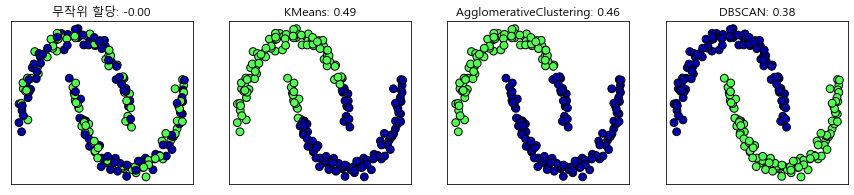

In [13]:
fig, axes= plt.subplots(1, 4, figsize= (15, 3),
                        subplot_kw= {'xticks': (), 'yticks': ()})

random_state= np.random.RandomState(seed= 0)
random_clusters= random_state.randint(low= 0, high= 2, size= len(x))

axes[0].scatter(x_scaled[:, 0], x_scaled[:, 1], c= random_clusters,
                cmap= mglearn.cm3, s= 60, edgecolors= 'black')
axes[0].set_title('무작위 할당: {:.2f}'.format(silhouette_score(x_scaled,
                                                       random_clusters)))

al= [KMeans(n_clusters= 2), AgglomerativeClustering(n_clusters= 2), DBSCAN()]

for ax, algorithm in zip (axes[1:], al):
    
    clusters= algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c= clusters,
               cmap= mglearn.cm3, s= 60, edgecolors= 'black')
    ax.set_title('{}: {:.2f}'.format(algorithm.__class__.__name__,
                                     silhouette_score(x_scaled, clusters)))

실루엣 계수가 높다고 하더라도 유의미하다라고 확정적으로 판단 불가.

In [14]:
from sklearn.datasets import fetch_lfw_people

In [15]:
people= fetch_lfw_people(min_faces_per_person= 20, resize= .7)
image_shape= people.images[0].shape

mask= np.zeros(people.target.shape, dtype= bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
    
x_people= people.data[mask]
y_people= people.target[mask]

x_people= x_people/255.

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca= PCA(n_components= 100, whiten= True, random_state= 0)
x_pca= pca.fit_transform(x_people)

### DBSCAN

In [18]:
dbscan= DBSCAN(min_samples= 3)
labels= dbscan.fit_predict(x_pca)
print('고유 레이블: ', np.unique(labels))

고유 레이블:  [-1]


In [19]:
dbscan= DBSCAN(min_samples= 3, eps= 15)
labels= dbscan.fit_predict(x_pca)
print('고유 레이블: ', np.unique(labels)) # 노이즈 데이터 발생

고유 레이블:  [-1  0]


In [20]:
print('클러스터별 포인트 수: ', np.bincount(labels+1))
#노이즈 데이터 20개 발생

클러스터별 포인트 수:  [  20 1083]


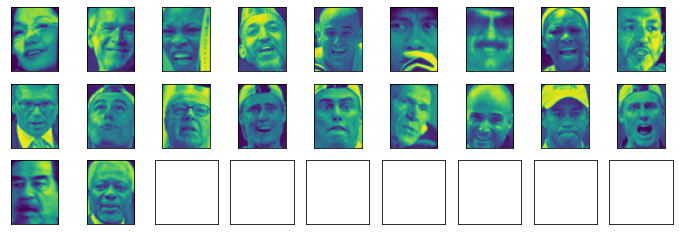

In [21]:
noise= x_people[labels == -1]

fig, axes= plt.subplots(3, 9, figsize= (12, 4),
                        subplot_kw= {'xticks': (), 'yticks': ()})

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin= 0, vmax= 1)

In [22]:
for eps in [1,3,5,7,9,11,13]:
    print('\neps= ', eps)
    dbscan= DBSCAN(eps= eps, min_samples= 3)
    labels= dbscan.fit_predict(x_pca)
    print('클러스터 수: ', len(np.unique(labels)))
    print('클러스터 크기: ', np.bincount(labels+1))


eps=  1
클러스터 수:  1
클러스터 크기:  [1103]

eps=  3
클러스터 수:  1
클러스터 크기:  [1103]

eps=  5
클러스터 수:  1
클러스터 크기:  [1103]

eps=  7
클러스터 수:  9
클러스터 크기:  [1050   15    3    3   15    5    6    3    3]

eps=  9
클러스터 수:  2
클러스터 크기:  [687 416]

eps=  11
클러스터 수:  2
클러스터 크기:  [252 851]

eps=  13
클러스터 수:  2
클러스터 크기:  [  80 1023]


#### 이상치 검출

### K-Means

In [23]:
n_clusters= 10

km= KMeans(n_clusters= n_clusters, random_state= 0)
labels_km= km.fit_predict(x_pca)
print('K-Means 클러스터 크기', np.bincount(labels_km))

K-Means 클러스터 크기 [  9 208 251 131 267  26  54  64  25  68]


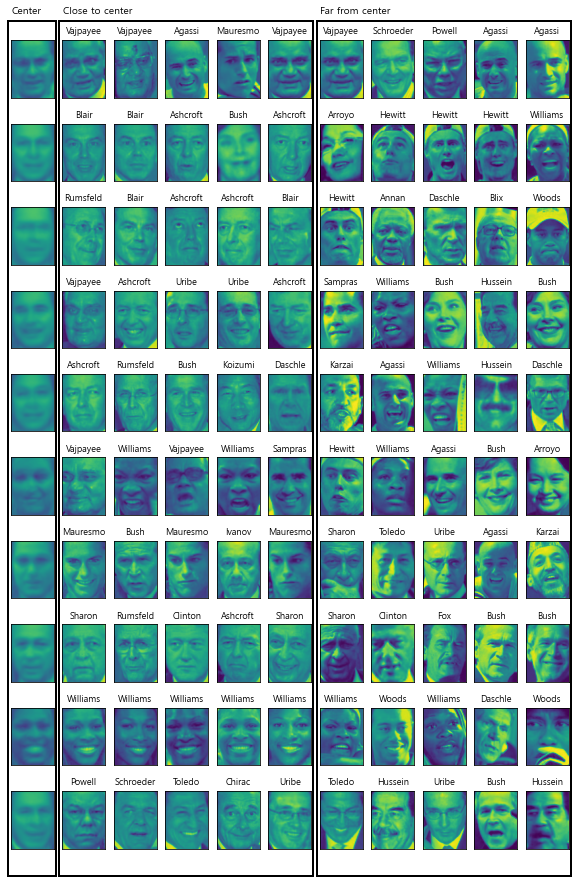

In [24]:
mglearn.plots.plot_kmeans_faces(km, pca, x_pca, x_people,
                                y_people, people.target_names)

### 계층적 군집으로 얼굴 분석

In [25]:
agg= AgglomerativeClustering(n_clusters= 10)
labels_agg= agg.fit_predict(x_pca)

print('군집별 클러스터 크기: ', np.bincount(labels_agg))

군집별 클러스터 크기:  [458 191  91   8 109  69   8 126  24  19]


In [26]:
print('ARI : {:.2f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI : 0.06


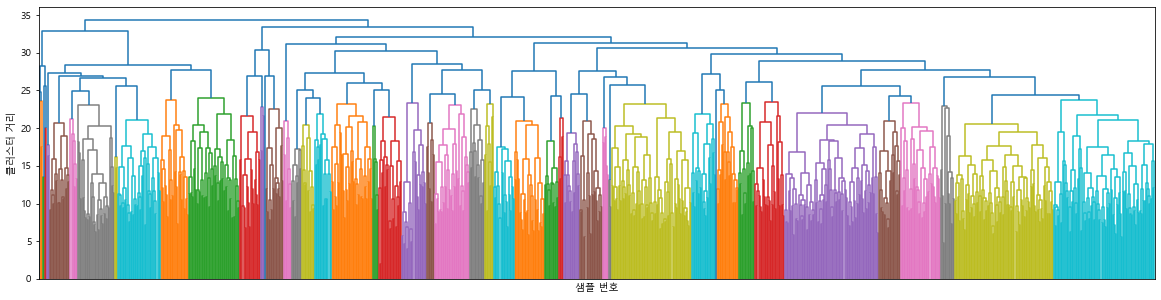

In [27]:
linkage_array= ward(x_pca) # => 클러스터 사이의 거리

plt.figure(figsize= (20, 5))
dendrogram(linkage_array, p= 7, no_labels= True)
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')
plt.show()

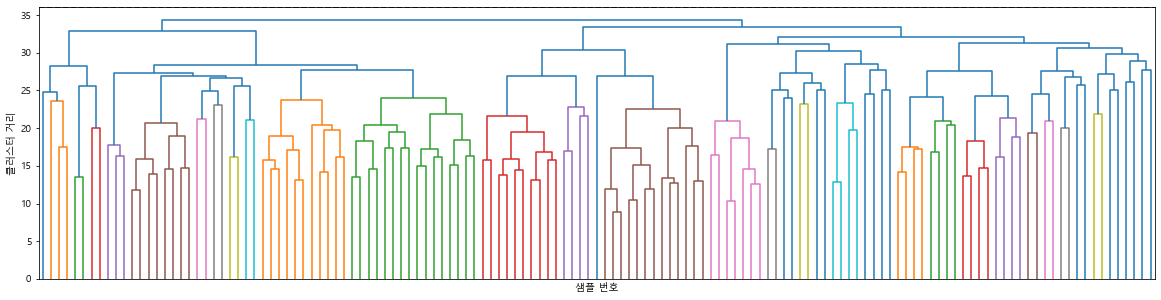

In [28]:
linkage_array= ward(x_pca) 

plt.figure(figsize= (20, 5))
dendrogram(linkage_array, p= 7, truncate_mode= 'level', no_labels= True)
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')

ax= plt.gca()
bounds= ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c= 'k')